<a href="https://www.kaggle.com/code/chenkuanpu/pneumonia-xray-inceptionv3?scriptVersionId=138336020" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# *1. Assign directories*

In [1]:
import os
import numpy as np
import pandas as pd

# Assign training and validation set directories
base_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Assign directories with training pictures 
train_normal = os.path.join(train_dir, 'NORMAL')
train_pneumonia = os.path.join(train_dir, 'PNEUMONIA')


# Assign directories with test pictures
test_normal = os.path.join(test_dir, 'NORMAL')
test_pneumonia = os.path.join(test_dir, 'PNEUMONIA')

# Assign directories with validation pictures
val_normal = os.path.join(val_dir, 'NORMAL')
val_pneumonia = os.path.join(val_dir, 'PNEUMONIA')

In [2]:
# Total number of pictures in training directory
train_normal_files = os.listdir(train_normal)
train_pneumonia_files = os.listdir(train_pneumonia)

# Total number of pictures in testing directory
test_normal_files = os.listdir(test_normal)
test_pneumonia_files = os.listdir(test_pneumonia)

# Total number of pictures in validation directory
val_normal_files = os.listdir(val_normal)
val_pneumonia_files = os.listdir(val_pneumonia)

print('-Total training images- \n',
      'Normal: ', len(train_normal_files), '\n',
      'Pneumonia: ', len(train_pneumonia_files), '\n',
      '',
      '-Total testing images- \n',
      'Normal: ', len(test_normal_files), '\n',
      'Pneumonia: ', len(test_pneumonia_files), '\n',
      '',
      '-Total validation images- \n',
      'Normal: ', len(val_normal_files), '\n',
      'Pneumonia: ', len(val_pneumonia_files), '\n')

-Total training images- 
 Normal:  1341 
 Pneumonia:  3875 
  -Total testing images- 
 Normal:  234 
 Pneumonia:  390 
  -Total validation images- 
 Normal:  8 
 Pneumonia:  8 



In [3]:
# Check the filename of the files
print('-File name of training images- \n',
      'Normal: \n', train_normal_files[:5], '\n',
      'Pneumonia: \n', train_pneumonia_files[:5], '\n',
      '',
      '-File name of testing images- \n',
      'Normal: \n', test_normal_files[:5], '\n',
      'Pneumonia: \n', test_pneumonia_files[:5], '\n',
      '',
      '-File name of validation images- \n',
      'Normal: \n', val_normal_files[:5], '\n',
      'Pneumonia: \n', val_pneumonia_files[:5], '\n')

-File name of training images- 
 Normal: 
 ['NORMAL2-IM-0771-0001.jpeg', 'NORMAL2-IM-1294-0001-0002.jpeg', 'IM-0675-0001.jpeg', 'NORMAL2-IM-1169-0001.jpeg', 'IM-0421-0001.jpeg'] 
 Pneumonia: 
 ['person1180_virus_2010.jpeg', 'person1230_virus_2081.jpeg', 'person1513_virus_2632.jpeg', 'person124_virus_238.jpeg', 'person746_virus_1369.jpeg'] 
  -File name of testing images- 
 Normal: 
 ['NORMAL2-IM-0336-0001.jpeg', 'IM-0101-0001.jpeg', 'NORMAL2-IM-0337-0001.jpeg', 'NORMAL2-IM-0198-0001.jpeg', 'IM-0013-0001.jpeg'] 
 Pneumonia: 
 ['person1676_virus_2892.jpeg', 'person1650_virus_2852.jpeg', 'person22_virus_55.jpeg', 'person122_bacteria_582.jpeg', 'person85_bacteria_417.jpeg'] 
  -File name of validation images- 
 Normal: 
 ['NORMAL2-IM-1431-0001.jpeg', 'NORMAL2-IM-1440-0001.jpeg', 'NORMAL2-IM-1442-0001.jpeg', 'NORMAL2-IM-1427-0001.jpeg', 'NORMAL2-IM-1430-0001.jpeg'] 
 Pneumonia: 
 ['person1947_bacteria_4876.jpeg', 'person1946_bacteria_4875.jpeg', 'person1952_bacteria_4883.jpeg', 'person1954_

# *2. X-ray Images*

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Show random 9 images from specific category.
def plot_images(category):
    category_path = globals()['train_' + category]
    filename = globals()['train_' + category + '_files']

    random_images = random.sample(filename, 9)

    nrows = 3
    ncols = 3
    fig, axes = plt.subplots(nrows, ncols, figsize = (6, 6))
    
    for i, img_file in enumerate(random_images):
        img_path = os.path.join(category_path, img_file) 
        img = mpimg.imread(img_path)
        sp = plt.subplot(nrows, ncols, i+1)
        sp.axis('off')
        plt.imshow(img)
        
    fig.suptitle(category + ' images')    
    plt.tight_layout()
    plt.show()

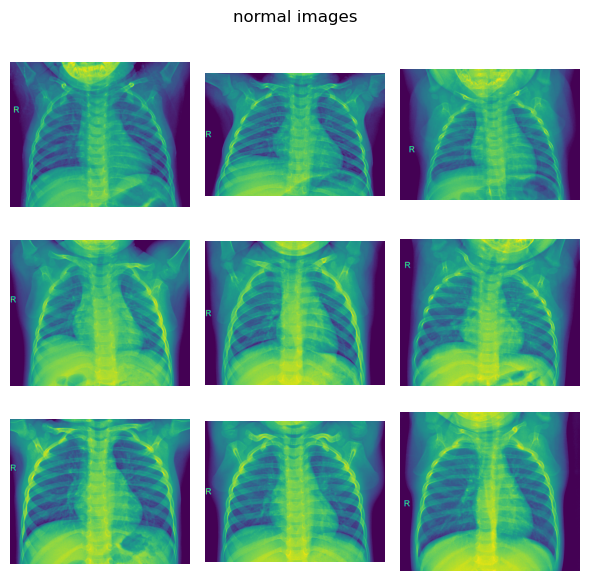

In [5]:
plot_images('normal')

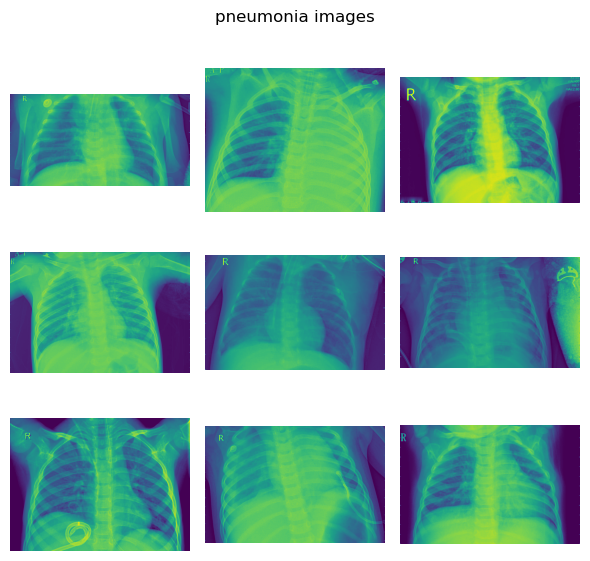

In [6]:
plot_images('pneumonia')

# *3. Image Pre-processing*

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight

def datagen_and_weights(img_size, batch_size, seed):
    # Define generator and argmentation
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        brightness_range=(0.9, 1.1),
        vertical_flip=False,
        horizontal_flip=False,
        fill_mode='nearest')

    test_datagen = ImageDataGenerator(rescale=1./255)

    val_datagen = ImageDataGenerator(rescale=1./255)
    
    # Flow images from directories
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        shuffle=True,
        seed=seed)

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        shuffle=True,
        seed=seed)

    val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        shuffle=True,
        seed=seed)
    
    # Using the weights of classes to improve unbalancing categories
    class_weights = class_weight.compute_class_weight(class_weight = "balanced", classes= np.unique(train_generator.classes), y= train_generator.classes)
    class_weights = dict(zip(np.unique(train_generator.classes), class_weights))
    
    return train_generator, test_generator, val_generator, class_weights

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

# *4. Build the model*

In [8]:
# Define the evaluation function
def plot_acc_loss():
    acc = history.history['binary_accuracy']
    val_acc = history.history['val_binary_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, 'r', label='Training Accuracy')
    plt.plot(epochs_range, val_acc, 'b', label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, 'r', label='Training Loss')
    plt.plot(epochs_range, val_loss, 'b', label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    plt.tight_layout()
    plt.show()

In [9]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Callback functions
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.001, patience=5)
early_stopping = EarlyStopping(monitor='val_binary_accuracy', patience=2, verbose=1, restore_best_weights=True)

## InceptionV3

In [10]:
# Parameters
img_size = 299
batch_size = 128
seed = 42

# Preprocessing
train_generator, test_generator, val_generator, class_weights = datagen_and_weights(img_size, batch_size, seed)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [11]:
from tensorflow.keras import regularizers, layers, models, optimizers, Model
from tensorflow.keras.applications import InceptionV3

# Transfer learning InceptionV3
pre_trained_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Freeze all layers in pretrained model
for layer in pre_trained_model.layers:
    layer.trainable = False

# Add dense layers
model = models.Sequential()
model.add(pre_trained_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

87910968/87910968 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 22,852,385
Trainable params: 1,049,601
Non-

In [12]:
# Set the training parameters
model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4),
              metrics = ['binary_accuracy'])

EPOCHS = 30
# Train the model
history = model.fit(train_generator,
                    epochs=EPOCHS,
                    steps_per_epoch=train_generator.samples//train_generator.batch_size,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples//test_generator.batch_size,
                    class_weight=class_weights,
                    callbacks=[lr_scheduler, early_stopping],
                    verbose=1)

Epoch 1/30
40/40 [==============================] - 775s 19s/step - loss: 0.3386 - binary_accuracy: 0.8504 - val_loss: 0.3926 - val_binary_accuracy: 0.8184 - lr: 1.0000e-04
Epoch 2/30
40/40 [==============================] - 762s 19s/step - loss: 0.2127 - binary_accuracy: 0.9086 - val_loss: 0.3612 - val_binary_accuracy: 0.8457 - lr: 1.0000e-04
Epoch 3/30
40/40 [==============================] - 760s 19s/step - loss: 0.1840 - binary_accuracy: 0.9224 - val_loss: 0.3518 - val_binary_accuracy: 0.8516 - lr: 1.0000e-04
Epoch 4/30
40/40 [==============================] - 761s 19s/step - loss: 0.1644 - binary_accuracy: 0.9320 - val_loss: 0.3352 - val_binary_accuracy: 0.8594 - lr: 1.0000e-04
Epoch 5/30
40/40 [==============================] - 763s 19s/step - loss: 0.1572 - binary_accuracy: 0.9363 - val_loss: 0.3244 - val_binary_accuracy: 0.8652 - lr: 1.0000e-04
Epoch 6/30
40/40 [==============================] - 745s 19s/step - loss: 0.1525 - binary_accuracy: 0.9389 - val_loss: 0.3131 - val_bin

1/1 [==============================] - 2s 2s/step - loss: 0.2082 - binary_accuracy: 0.9375
Validation Loss: 0.2082296907901764
Validation Accuracy: 0.9375


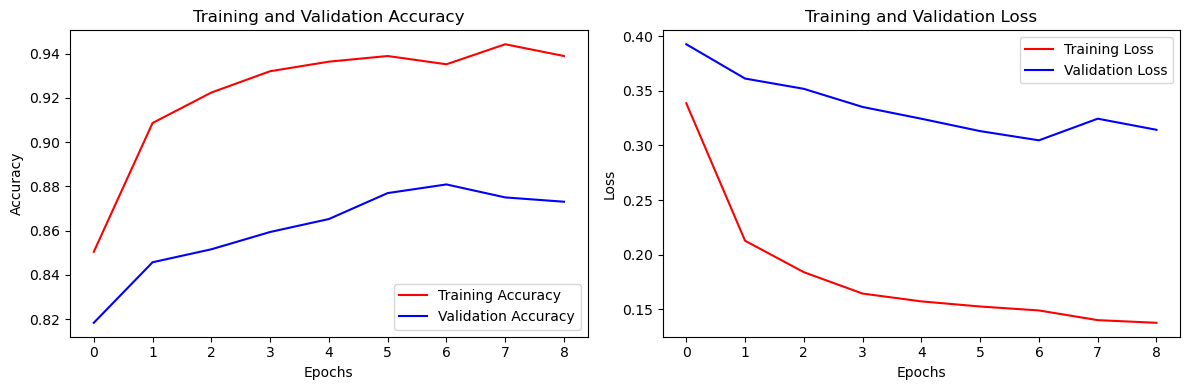

In [13]:
val_loss, val_accuracy = model.evaluate(val_generator, steps=len(val_generator))
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
plot_acc_loss()

### Build Deeper Networks

In [14]:
from tensorflow.keras import regularizers, layers, models, optimizers, Model
from tensorflow.keras.applications import InceptionV3

# Transfer learning InceptionV3
pre_trained_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Freeze all layers in pretrained model
for layer in pre_trained_model.layers:
    layer.trainable = False

# Add dense layers
model = models.Sequential()
model.add(pre_trained_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                      

In [15]:
# Set the training parameters
model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4),
              metrics = ['binary_accuracy'])

EPOCHS = 30
# Train the model
history = model.fit(train_generator,
                    epochs=EPOCHS,
                    steps_per_epoch=train_generator.samples//train_generator.batch_size,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples//test_generator.batch_size,
                    class_weight=class_weights,
                    callbacks=[lr_scheduler, early_stopping],
                    verbose=1)

Epoch 1/30
40/40 [==============================] - 751s 19s/step - loss: 0.4333 - binary_accuracy: 0.8137 - val_loss: 0.4326 - val_binary_accuracy: 0.7949 - lr: 1.0000e-04
Epoch 2/30
40/40 [==============================] - 743s 18s/step - loss: 0.2481 - binary_accuracy: 0.8998 - val_loss: 0.4187 - val_binary_accuracy: 0.8008 - lr: 1.0000e-04
Epoch 3/30
40/40 [==============================] - 762s 19s/step - loss: 0.2132 - binary_accuracy: 0.9082 - val_loss: 0.3482 - val_binary_accuracy: 0.8652 - lr: 1.0000e-04
Epoch 4/30
40/40 [==============================] - 760s 19s/step - loss: 0.1950 - binary_accuracy: 0.9230 - val_loss: 0.3654 - val_binary_accuracy: 0.8398 - lr: 1.0000e-04
Epoch 5/30
40/40 [==============================] - 760s 19s/step - loss: 0.1769 - binary_accuracy: 0.9273 - val_loss: 0.3482 - val_binary_accuracy: 0.8555 - lr: 1.0000e-04
Epoch 5: early stopping


1/1 [==============================] - 2s 2s/step - loss: 0.1608 - binary_accuracy: 1.0000
Validation Loss: 0.16077259182929993
Validation Accuracy: 1.0


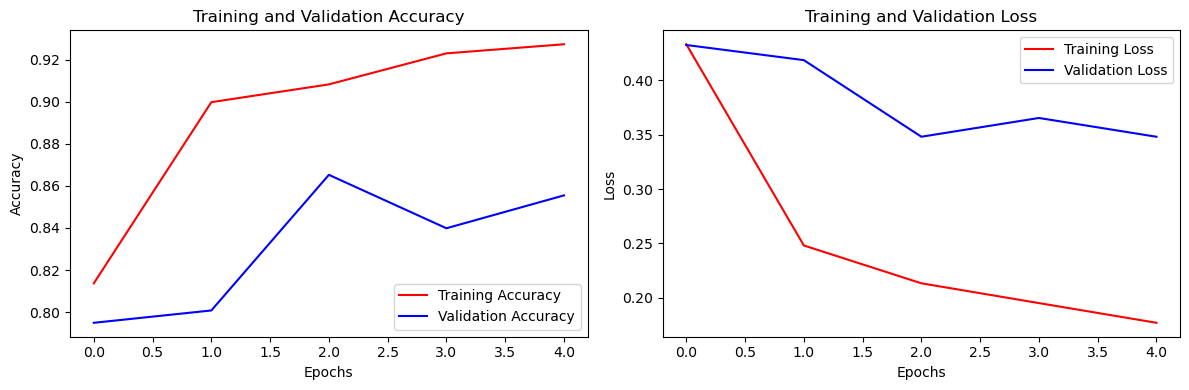

In [16]:
val_loss, val_accuracy = model.evaluate(val_generator, steps=len(val_generator))
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
plot_acc_loss()